## Prima parte Data mining

In [1]:
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import plotly as py
import cufflinks as cf
#py.offline.init_notebook_mode(connected=True) 
#cf.go_offline() 

In [2]:
df=pd.read_csv('train.csv', skipinitialspace=True)

In [3]:
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [4]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
       'n_bars', 'popularity_confidence', 'processing', 'genre'],
      dtype='object')

In [5]:
df['n_beats'].max()

7348.0

In [6]:
df['n_bars'].max()

2170.0

In [7]:
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000
mean,2.468075e+05,27.423667,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647
std,1.279941e+05,18.587534,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616
min,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116
25%,1.800000e+05,14.000000,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953
50%,2.278260e+05,24.000000,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916
75%,2.889030e+05,42.000000,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057
max,4.120258e+06,94.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,4.120258e+06,5.000000,7348.000000,2170.00000,1.000000,4.067086


In [8]:
df.dtypes

name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

## Correlazioni

In [9]:
df.corr()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
duration_ms,1.000000,-0.048723,-0.076202,-0.080932,0.102996,0.016712,0.039403,-0.023310,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.999918,0.009033,0.839313,0.838041,-0.005830,-0.010400
explicit,-0.048723,1.000000,-0.013096,0.056992,0.124405,-0.000991,0.131777,-0.042846,0.294287,-0.113975,-0.125101,0.006995,0.008631,0.016972,-0.048699,0.051260,-0.039830,-0.039435,0.029119,-0.005878
popularity,-0.076202,-0.013096,1.000000,0.051046,-0.056547,-0.008992,0.046703,0.073043,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.076228,-0.003160,-0.084774,-0.089134,-0.003665,0.008733
danceability,-0.080932,0.056992,0.051046,1.000000,0.193940,0.035311,0.385244,-0.072422,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,-0.080891,0.292167,-0.033604,-0.069332,0.011602,-0.026273
energy,0.102996,0.124405,-0.056547,0.193940,1.000000,0.057815,0.720907,-0.079969,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.102985,0.204646,0.243586,0.208615,0.040022,-0.037847
key,0.016712,-0.000991,-0.008992,0.035311,0.057815,1.000000,0.047718,-0.157515,0.018157,-0.049867,-0.001532,-0.007420,0.028221,0.022414,0.016786,0.028388,0.027133,0.022042,0.019790,-0.490366
loudness,0.039403,0.131777,0.046703,0.385244,0.720907,0.047718,1.000000,-0.033544,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.039415,0.250568,0.165565,0.131064,0.049174,-0.020563
mode,-0.023310,-0.042846,0.073043,-0.072422,-0.079969,-0.157515,-0.033544,1.000000,-0.064289,0.085246,-0.080035,0.015738,-0.006907,-0.013001,-0.023409,-0.019378,-0.030685,-0.027687,0.003698,0.261129
speechiness,-0.074774,0.294287,-0.096382,0.111454,0.143454,0.018157,0.109793,-0.064289,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,-0.074722,0.080739,-0.043217,-0.040820,0.026399,-0.022909
acousticness,-0.184902,-0.113975,0.078424,-0.199082,-0.699454,-0.049867,-0.552519,0.085246,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.184846,-0.139706,-0.283324,-0.248164,-0.021155,0.022684


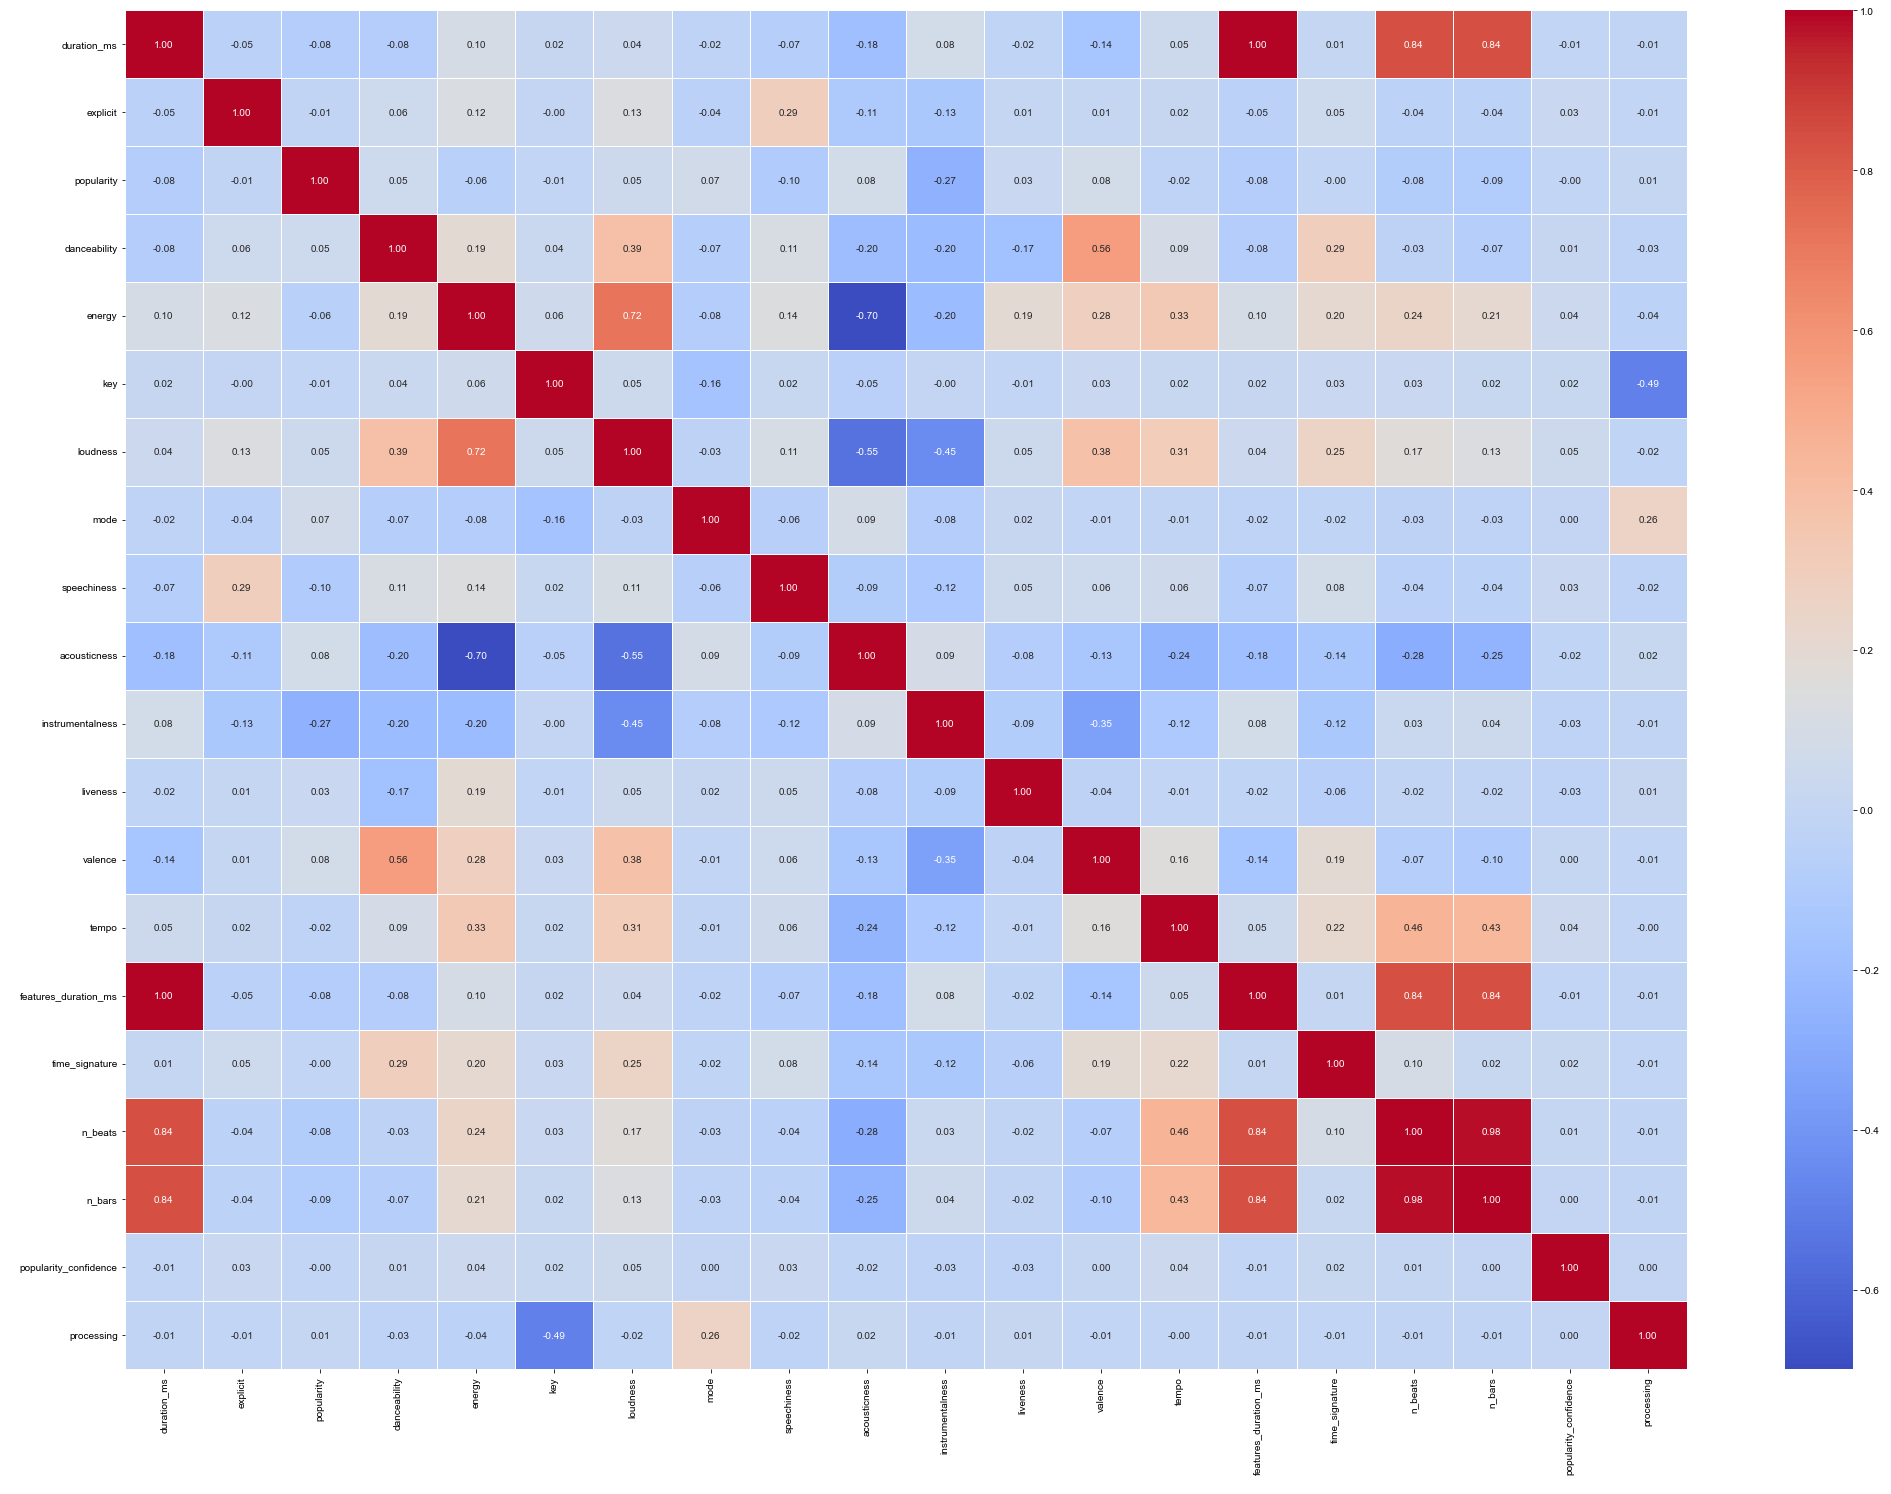

In [10]:
plt.figure(figsize = (35, 25))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True, fmt=".2f", linewidth='.8') 
sns.set(font_scale=3)
 

In [11]:
sns.set(font_scale=1)

In [12]:
x = df['loudness']
y = df['energy']


(corr_pearson, pvalue) =sp.stats.pearsonr(x, y)
print("Coefficiente di Pearson:", round(corr_pearson,2))
print("p-value:", pvalue)

Coefficiente di Pearson: 0.72
p-value: 0.0


<Axes: xlabel='duration_ms', ylabel='n_beats'>

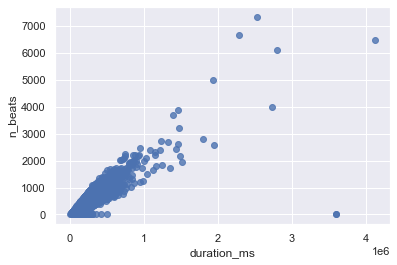

In [13]:
sns.regplot(x='duration_ms', y='n_beats', fit_reg=False, data=df)

<Axes: xlabel='duration_ms', ylabel='n_bars'>

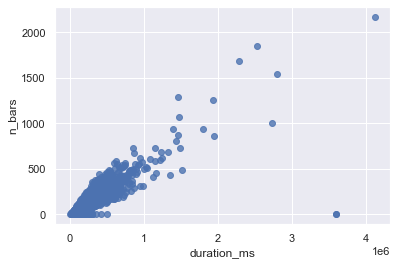

In [14]:
sns.regplot(x='duration_ms', y='n_bars', fit_reg=False, data=df)

<Axes: xlabel='danceability', ylabel='popularity'>

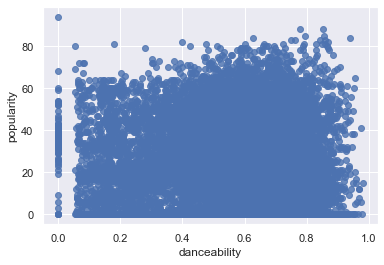

In [15]:
sns.regplot(x='danceability', y='popularity', fit_reg=False, data=df)


<Axes: xlabel='energy', ylabel='popularity'>

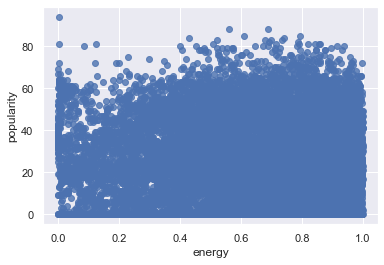

In [16]:
sns.regplot(x='energy', y='popularity', fit_reg=False, data=df)

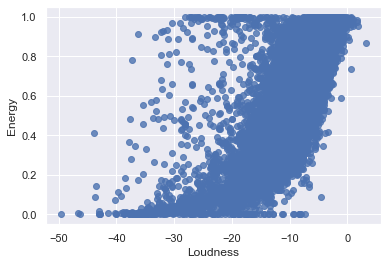

In [17]:
sns.regplot(x='loudness', y='energy', fit_reg=False, data=df)
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()

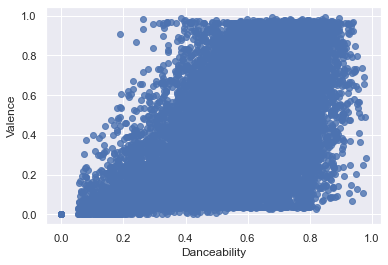

In [18]:
sns.regplot(x='danceability', y='valence', fit_reg=False, data=df)
plt.xlabel('Danceability')
plt.ylabel('Valence')
#plt.legend()
plt.show()

## Identificare il genere più frequente

In [19]:
a=df['genre'].to_list() #lista dei generi

In [20]:
set(a) ## tutti i generi

{'afrobeat',
 'black-metal',
 'bluegrass',
 'brazil',
 'breakbeat',
 'chicago-house',
 'disney',
 'forro',
 'happy',
 'idm',
 'indian',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'mandopop',
 'sleep',
 'spanish',
 'study',
 'techno'}

In [21]:
counts = df['genre'].value_counts() #conteggio delle occorrenze
counts

j-dance          750
iranian          750
brazil           750
chicago-house    750
forro            750
idm              750
indian           750
study            750
disney           750
afrobeat         750
mandopop         750
techno           750
sleep            750
spanish          750
j-idol           750
industrial       750
happy            750
bluegrass        750
black-metal      750
breakbeat        750
Name: genre, dtype: int64

## Identificazione outliers

<Axes: ylabel='danceability'>

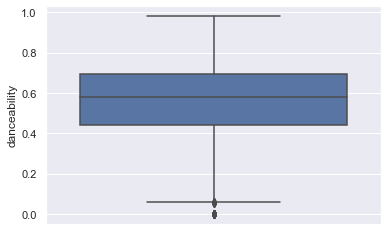

In [22]:
sns.boxplot(y=df["danceability"])

<Axes: ylabel='valence'>

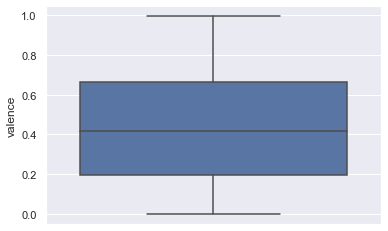

In [23]:
sns.boxplot(y=df["valence"])

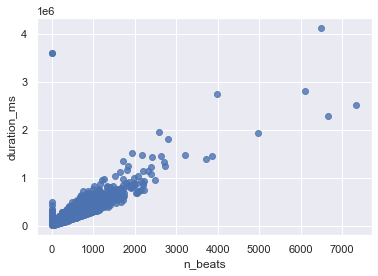

In [24]:
sns.regplot(x='n_beats', y='duration_ms', fit_reg=False, data=df)
plt.xlabel('n_beats')
plt.ylabel('duration_ms')
#plt.legend()
plt.show()

<Axes: ylabel='n_bars'>

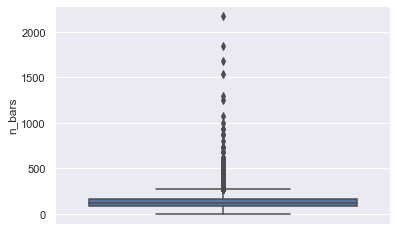

In [25]:
sns.boxplot(y=df["n_bars"])

<Axes: ylabel='n_beats'>

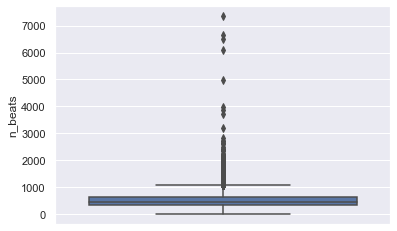

In [26]:
sns.boxplot(y=df["n_beats"])

In [27]:
df['n_beats'].mean()

501.8623333333333

<Axes: xlabel='n_beats', ylabel='Count'>

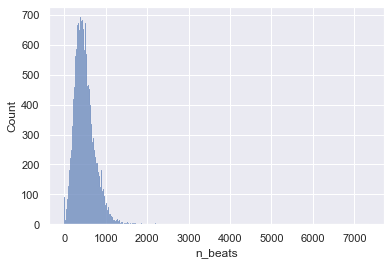

In [28]:
sns.histplot(df['n_beats']) 

In [29]:
df['n_beats'].kurt()

75.45567628539021

In [30]:
df['n_beats'].skew()

4.6097396061302165

In [31]:
Q1=df['n_beats'].quantile(0.25, interpolation='linear')
Q3=df['n_beats'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df.loc[(df['n_beats'] > Lowference)  & (df['n_beats'] < Upperfence) ]
NORMAL['n_beats'].mean()

478.378066279467

<Axes: xlabel='n_beats', ylabel='Count'>

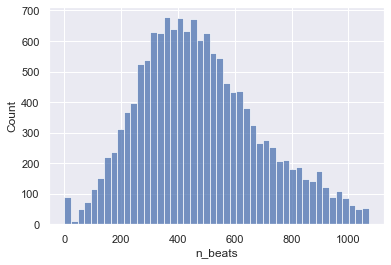

In [32]:
sns.histplot(NORMAL['n_beats']) 

In [33]:
NORMAL['n_beats'].kurt()

-0.19749618395445445

In [34]:
NORMAL['n_beats'].skew()

0.4451443756642775

<Axes: ylabel='popularity'>

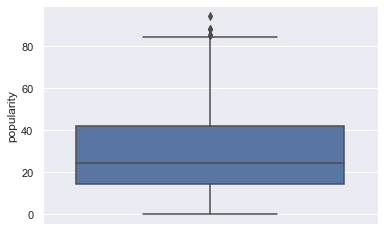

In [35]:
sns.boxplot(y=df["popularity"])

0.34775809858246076
-0.6574724836786743
27.423666666666666
24.0
18.58753362649236
Normalizzo
0.3391661668562116
-0.6841691791789422
27.395918095111053
24.0
18.547305016046682


<Axes: xlabel='popularity', ylabel='Count'>

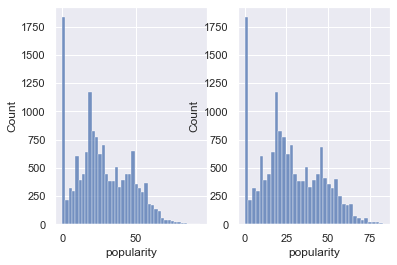

In [36]:
print(df["popularity"].skew())
print(df["popularity"].kurt())
print(df["popularity"].mean())
print(df["popularity"].median())
print(df["popularity"].std())
Q1=df['popularity'].quantile(0.25, interpolation='linear')
Q3=df['popularity'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df.loc[(df['popularity'] > Lowference)  & (df['popularity'] < Upperfence) ]

print("Normalizzo")
print(NORMAL["popularity"].skew())
print(NORMAL["popularity"].kurt())
print(NORMAL["popularity"].mean())
print(NORMAL["popularity"].median())
print(NORMAL["popularity"].std())

plt.subplot(1,2,1)
sns.histplot(data=df["popularity"])
plt.subplot(1,2,2)
sns.histplot(data=NORMAL["popularity"])

-2.0223728753458534
5.280106273650121
-8.894999333333335
-7.303
6.005799027417593
Normalizzo
-0.7785890871900353
0.2434340124276786
-7.6717937982280695
-6.9965
3.748274794456156


<Axes: xlabel='loudness', ylabel='Count'>

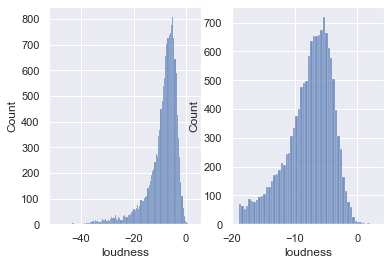

In [37]:
print(df["loudness"].skew())
print(df["loudness"].kurt())
print(df["loudness"].mean())
print(df["loudness"].median())
print(df["loudness"].std())
Q1=df['loudness'].quantile(0.25, interpolation='linear')
Q3=df['loudness'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df.loc[(df['loudness'] > Lowference)  & (df['loudness'] < Upperfence) ]

print("Normalizzo")
print(NORMAL["loudness"].skew())
print(NORMAL["loudness"].kurt())
print(NORMAL["loudness"].mean())
print(NORMAL["loudness"].median())
print(NORMAL["loudness"].std())

plt.subplot(1,2,1)
sns.histplot(data=df["loudness"])
plt.subplot(1,2,2)
sns.histplot(data=NORMAL["loudness"])

-0.11991859776758901
0.4262944914493203
123.11654359999972
124.188
31.930958448714463
Normalizzo
0.17531413826438297
-0.5602943346586255
123.7746229596289
124.616
30.375695060707866


<Axes: xlabel='tempo', ylabel='Count'>

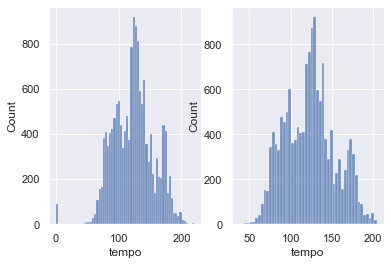

In [38]:
print(df["tempo"].skew())
print(df["tempo"].kurt())
print(df["tempo"].mean())
print(df["tempo"].median())
print(df["tempo"].std())
Q1=df['tempo'].quantile(0.25, interpolation='linear')
Q3=df['tempo'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df.loc[(df['tempo'] > Lowference)  & (df['tempo'] < Upperfence) ]

print("Normalizzo")
print(NORMAL["tempo"].skew())
print(NORMAL["tempo"].kurt())
print(NORMAL["tempo"].mean())
print(NORMAL["tempo"].median())
print(NORMAL["tempo"].std())

plt.subplot(1,2,1)
sns.histplot(data=df["tempo"])
plt.subplot(1,2,2)
sns.histplot(data=NORMAL["tempo"])

7.74232348312866
161.60690862417295
246794.68353333333
227818.5
127984.9912723444
Normalizzo
0.3576368544081715
-0.027867152052701627
231427.82210636078
224000.0
80602.20666526198


<Axes: xlabel='features_duration_ms', ylabel='Count'>

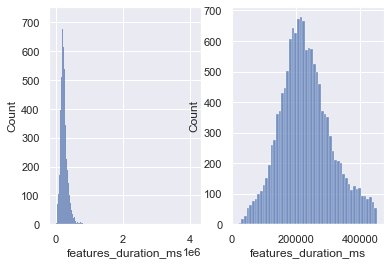

In [39]:
print(df["features_duration_ms"].skew())
print(df["features_duration_ms"].kurt())
print(df["features_duration_ms"].mean())
print(df["features_duration_ms"].median())
print(df["features_duration_ms"].std())
Q1=df['features_duration_ms'].quantile(0.25, interpolation='linear')
Q3=df['features_duration_ms'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df.loc[(df['features_duration_ms'] > Lowference)  & (df['features_duration_ms'] < Upperfence) ]

print("Normalizzo")
print(NORMAL["features_duration_ms"].skew())
print(NORMAL["features_duration_ms"].kurt())
print(NORMAL["features_duration_ms"].mean())
print(NORMAL["features_duration_ms"].median())
print(NORMAL["features_duration_ms"].std())

plt.subplot(1,2,1)
sns.histplot(data=df["features_duration_ms"])
plt.subplot(1,2,2)
sns.histplot(data=NORMAL["features_duration_ms"])    

5.294699146302928
91.30564244945214
128.3934
117.0
75.11390978420394
Normalizzo
0.46144629560776607
-0.1881144780133268
121.41802604523646
115.0
54.37054953121843


<Axes: xlabel='n_bars', ylabel='Count'>

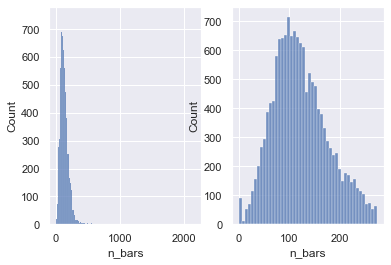

In [40]:
print(df["n_bars"].skew())
print(df["n_bars"].kurt())
print(df["n_bars"].mean())
print(df["n_bars"].median())
print(df["n_bars"].std())
Q1=df['n_bars'].quantile(0.25, interpolation='linear')
Q3=df['n_bars'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df.loc[(df['n_bars'] > Lowference)  & (df['n_bars'] < Upperfence) ]

print("Normalizzo")
print(NORMAL["n_bars"].skew())
print(NORMAL["n_bars"].kurt())
print(NORMAL["n_bars"].mean())
print(NORMAL["n_bars"].median())
print(NORMAL["n_bars"].std())

plt.subplot(1,2,1)
sns.histplot(data=df["n_bars"])
plt.subplot(1,2,2)
sns.histplot(data=NORMAL["n_bars"]) 

7.740693653389981
161.55757594583622
246807.48013333333
227826.0
127994.05482558187
Normalizzo
0.3578138687543199
-0.02752586193288531
231425.58565072302
224000.0
80600.86400542181


<Axes: xlabel='duration_ms', ylabel='Count'>

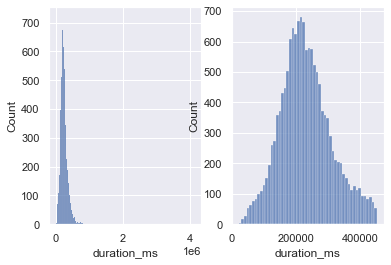

In [50]:
print(df["duration_ms"].skew())
print(df["duration_ms"].kurt())
print(df["duration_ms"].mean())
print(df["duration_ms"].median())
print(df["duration_ms"].std())
Q1=df['duration_ms'].quantile(0.25, interpolation='linear')
Q3=df['duration_ms'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df.loc[(df['duration_ms'] > Lowference)  & (df['duration_ms'] < Upperfence) ]

print("Normalizzo")
print(NORMAL["duration_ms"].skew())
print(NORMAL["duration_ms"].kurt())
print(NORMAL["duration_ms"].mean())
print(NORMAL["duration_ms"].median())
print(NORMAL["duration_ms"].std())

plt.subplot(1,2,1)
sns.histplot(data=df["duration_ms"])
plt.subplot(1,2,2)
sns.histplot(data=NORMAL["duration_ms"]) 

<Axes: ylabel='duration_ms'>

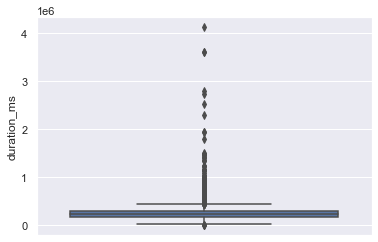

In [42]:
sns.boxplot(y=df["duration_ms"])
#sns.histplot(data=df)

4.6097396061302165
75.45567628539021
501.8623333333333
461.0
280.68980405237846
Normalizzo
0.4451443756642775
-0.19749618395445445
478.378066279467
454.0
213.11919750179112


<Axes: xlabel='n_beats', ylabel='Count'>

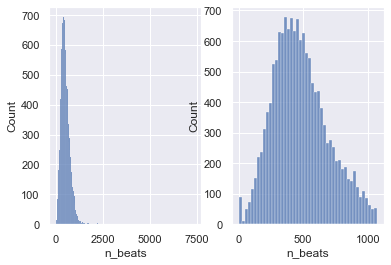

In [51]:
print(df["n_beats"].skew())
print(df["n_beats"].kurt())
print(df["n_beats"].mean())
print(df["n_beats"].median())
print(df["n_beats"].std())
Q1=df['n_beats'].quantile(0.25, interpolation='linear')
Q3=df['n_beats'].quantile(0.75, interpolation='linear')
IQR=Q3-Q1
Lowference= Q1-1.5*IQR 
Upperfence=Q3+1.5*IQR
NORMAL = df.loc[(df['n_beats'] > Lowference)  & (df['n_beats'] < Upperfence) ]

print("Normalizzo")
print(NORMAL["n_beats"].skew())
print(NORMAL["n_beats"].kurt())
print(NORMAL["n_beats"].mean())
print(NORMAL["n_beats"].median())
print(NORMAL["n_beats"].std())

plt.subplot(1,2,1)
sns.histplot(data=df["n_beats"])
plt.subplot(1,2,2)
sns.histplot(data=NORMAL["n_beats"]) 

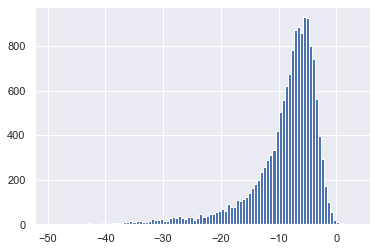

In [43]:
df['loudness'].hist(bins=100) #calcola i bins
plt.show()

In [44]:
len(df['loudness'])

15000

In [45]:
len(df['genre'])

15000

<Axes: xlabel='loudness', ylabel='energy'>

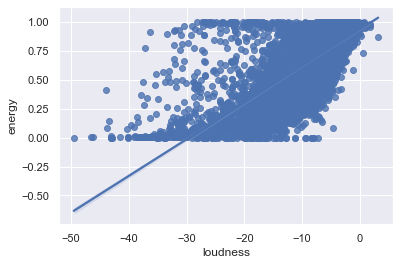

In [46]:
sns.regplot(x="loudness", y="energy", fit_reg=True, data=df)



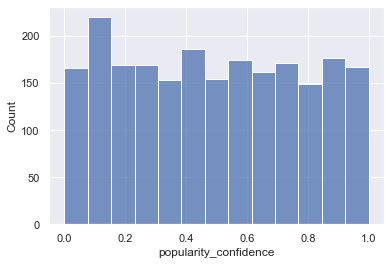

In [47]:
sns.histplot(df['popularity_confidence']) #,kde=False
sns.set_style("darkgrid")



## Valori nulli

In [48]:
df.isnull().sum() #valori nulli per colonna 

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

In [49]:
df.isnull().any()

name                     False
duration_ms              False
explicit                 False
popularity               False
artists                  False
album_name               False
danceability             False
energy                   False
key                      False
loudness                 False
mode                      True
speechiness              False
acousticness             False
instrumentalness         False
liveness                 False
valence                  False
tempo                    False
features_duration_ms     False
time_signature            True
n_beats                  False
n_bars                   False
popularity_confidence     True
processing               False
genre                    False
dtype: bool